In [3]:
#!pip install tensorflow==2.0


     |████████████████████████████████| 86.3 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 449 kB 38.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 66.5 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 8.4 MB/s  eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=236d8e59ef6993bf2409c5b8498488276c1ab465fcc09de075c4fb12bcb19e28
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=36040 sha256=44c1dd110b5c9243fe4f5e8b408f87d901bfc76367dc49b55f6a9ffc7adcf4ad
  Stored in directory: /home/jov

In [6]:
# Import datasets and libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [11]:
# Load the training dataset
instagram_df_train = pd.read_csv('insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
5,1,0.00,4,0.00,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.00,0,50,0,0,16,122,177,0
7,1,0.00,2,0.00,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.00,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.00,0,40,1,0,213,12945,813,0


In [12]:
# Load the testing data
instagram_df_test = pd.read_csv('insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
5,1,0.00,1,0.00,0,0,0,1,6,362,424,0
6,1,0.00,1,0.00,0,132,0,1,9,213,254,0
7,1,0.00,2,0.00,0,0,0,1,19,552,521,0
8,1,0.00,2,0.00,0,96,0,1,17,122,143,0
9,1,0.00,1,0.00,0,78,0,1,9,834,358,0


In [14]:
# Print the first and last 5 rows in both the training and testing DataFrames
instagram_df_train.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [15]:
instagram_df_train.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [16]:
instagram_df_test.head(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [17]:
instagram_df_test.tail(5)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [ ]:
# Perform exploratory data analysis


In [18]:
# Getting dataframe info
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
profile pic             576 non-null int64
nums/length username    576 non-null float64
fullname words          576 non-null int64
nums/length fullname    576 non-null float64
name==username          576 non-null int64
description length      576 non-null int64
external URL            576 non-null int64
private                 576 non-null int64
#posts                  576 non-null int64
#followers              576 non-null int64
#follows                576 non-null int64
fake                    576 non-null int64
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [19]:
# Get the statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [20]:
# Checking if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [21]:
# Get the number of unique values in the "profile pic" feature
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [22]:
# Get the number of unique values in "fake" (Target column)
instagram_df_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

In [23]:
# Getting test info
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
profile pic             120 non-null int64
nums/length username    120 non-null float64
fullname words          120 non-null int64
nums/length fullname    120 non-null float64
name==username          120 non-null int64
description length      120 non-null int64
external URL            120 non-null int64
private                 120 non-null int64
#posts                  120 non-null int64
#followers              120 non-null int64
#follows                120 non-null int64
fake                    120 non-null int64
dtypes: float64(2), int64(10)
memory usage: 11.3 KB


In [24]:
# Get the statistical summary of the dataframe
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [25]:
# Checking if null values exist
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [26]:
# Get the number of unique values in the "profile pic" feature
instagram_df_test['profile pic'].value_counts()

1    91
0    29
Name: profile pic, dtype: int64

In [27]:
# Get the number of unique values in "fake" (Target column)
instagram_df_test['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64

In [ ]:
# Perform data visualization

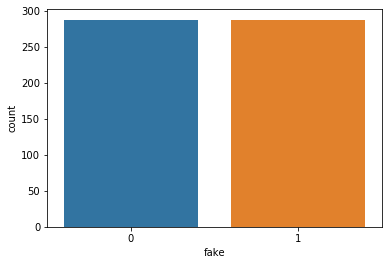

In [28]:
# Visualize the data
sns.countplot(instagram_df_train['fake'])

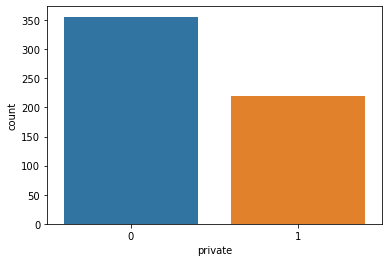

In [29]:
# Visualize the private column data
sns.countplot(instagram_df_train['private'])

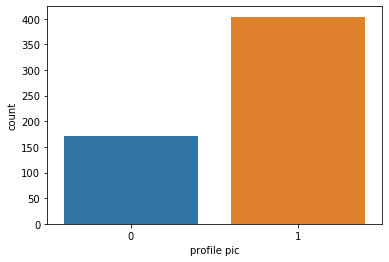

In [30]:
# Visualize the "profile pic" column data
sns.countplot(instagram_df_train['profile pic'])

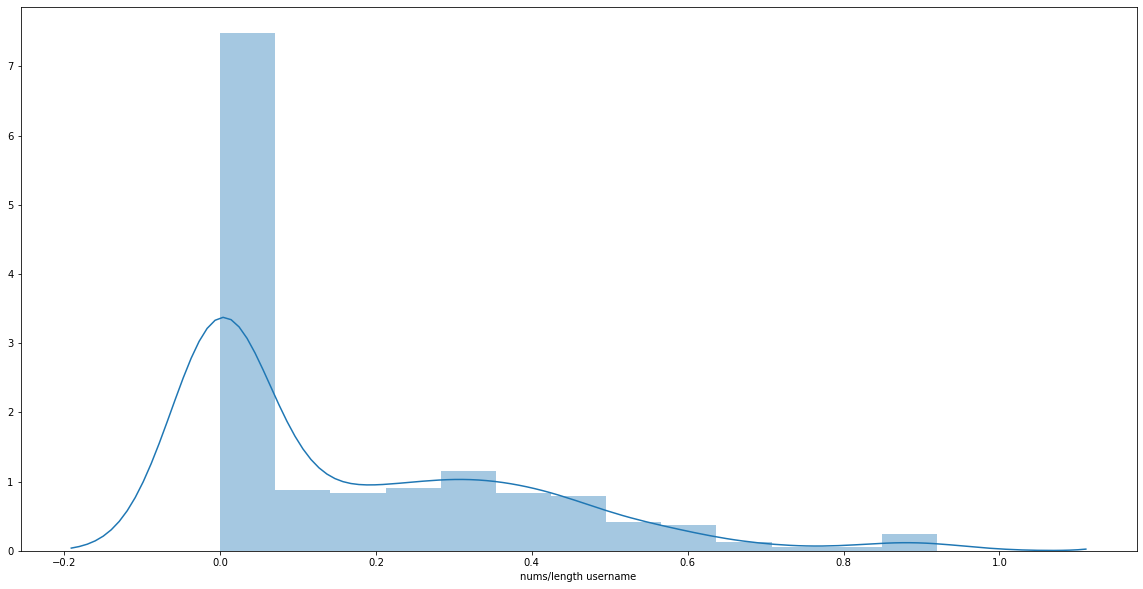

In [31]:
# Visualize the data
plt.figure(figsize = (20,10))
sns.distplot(instagram_df_train['nums/length username'])

<Figure size 1440x1440 with 0 Axes>

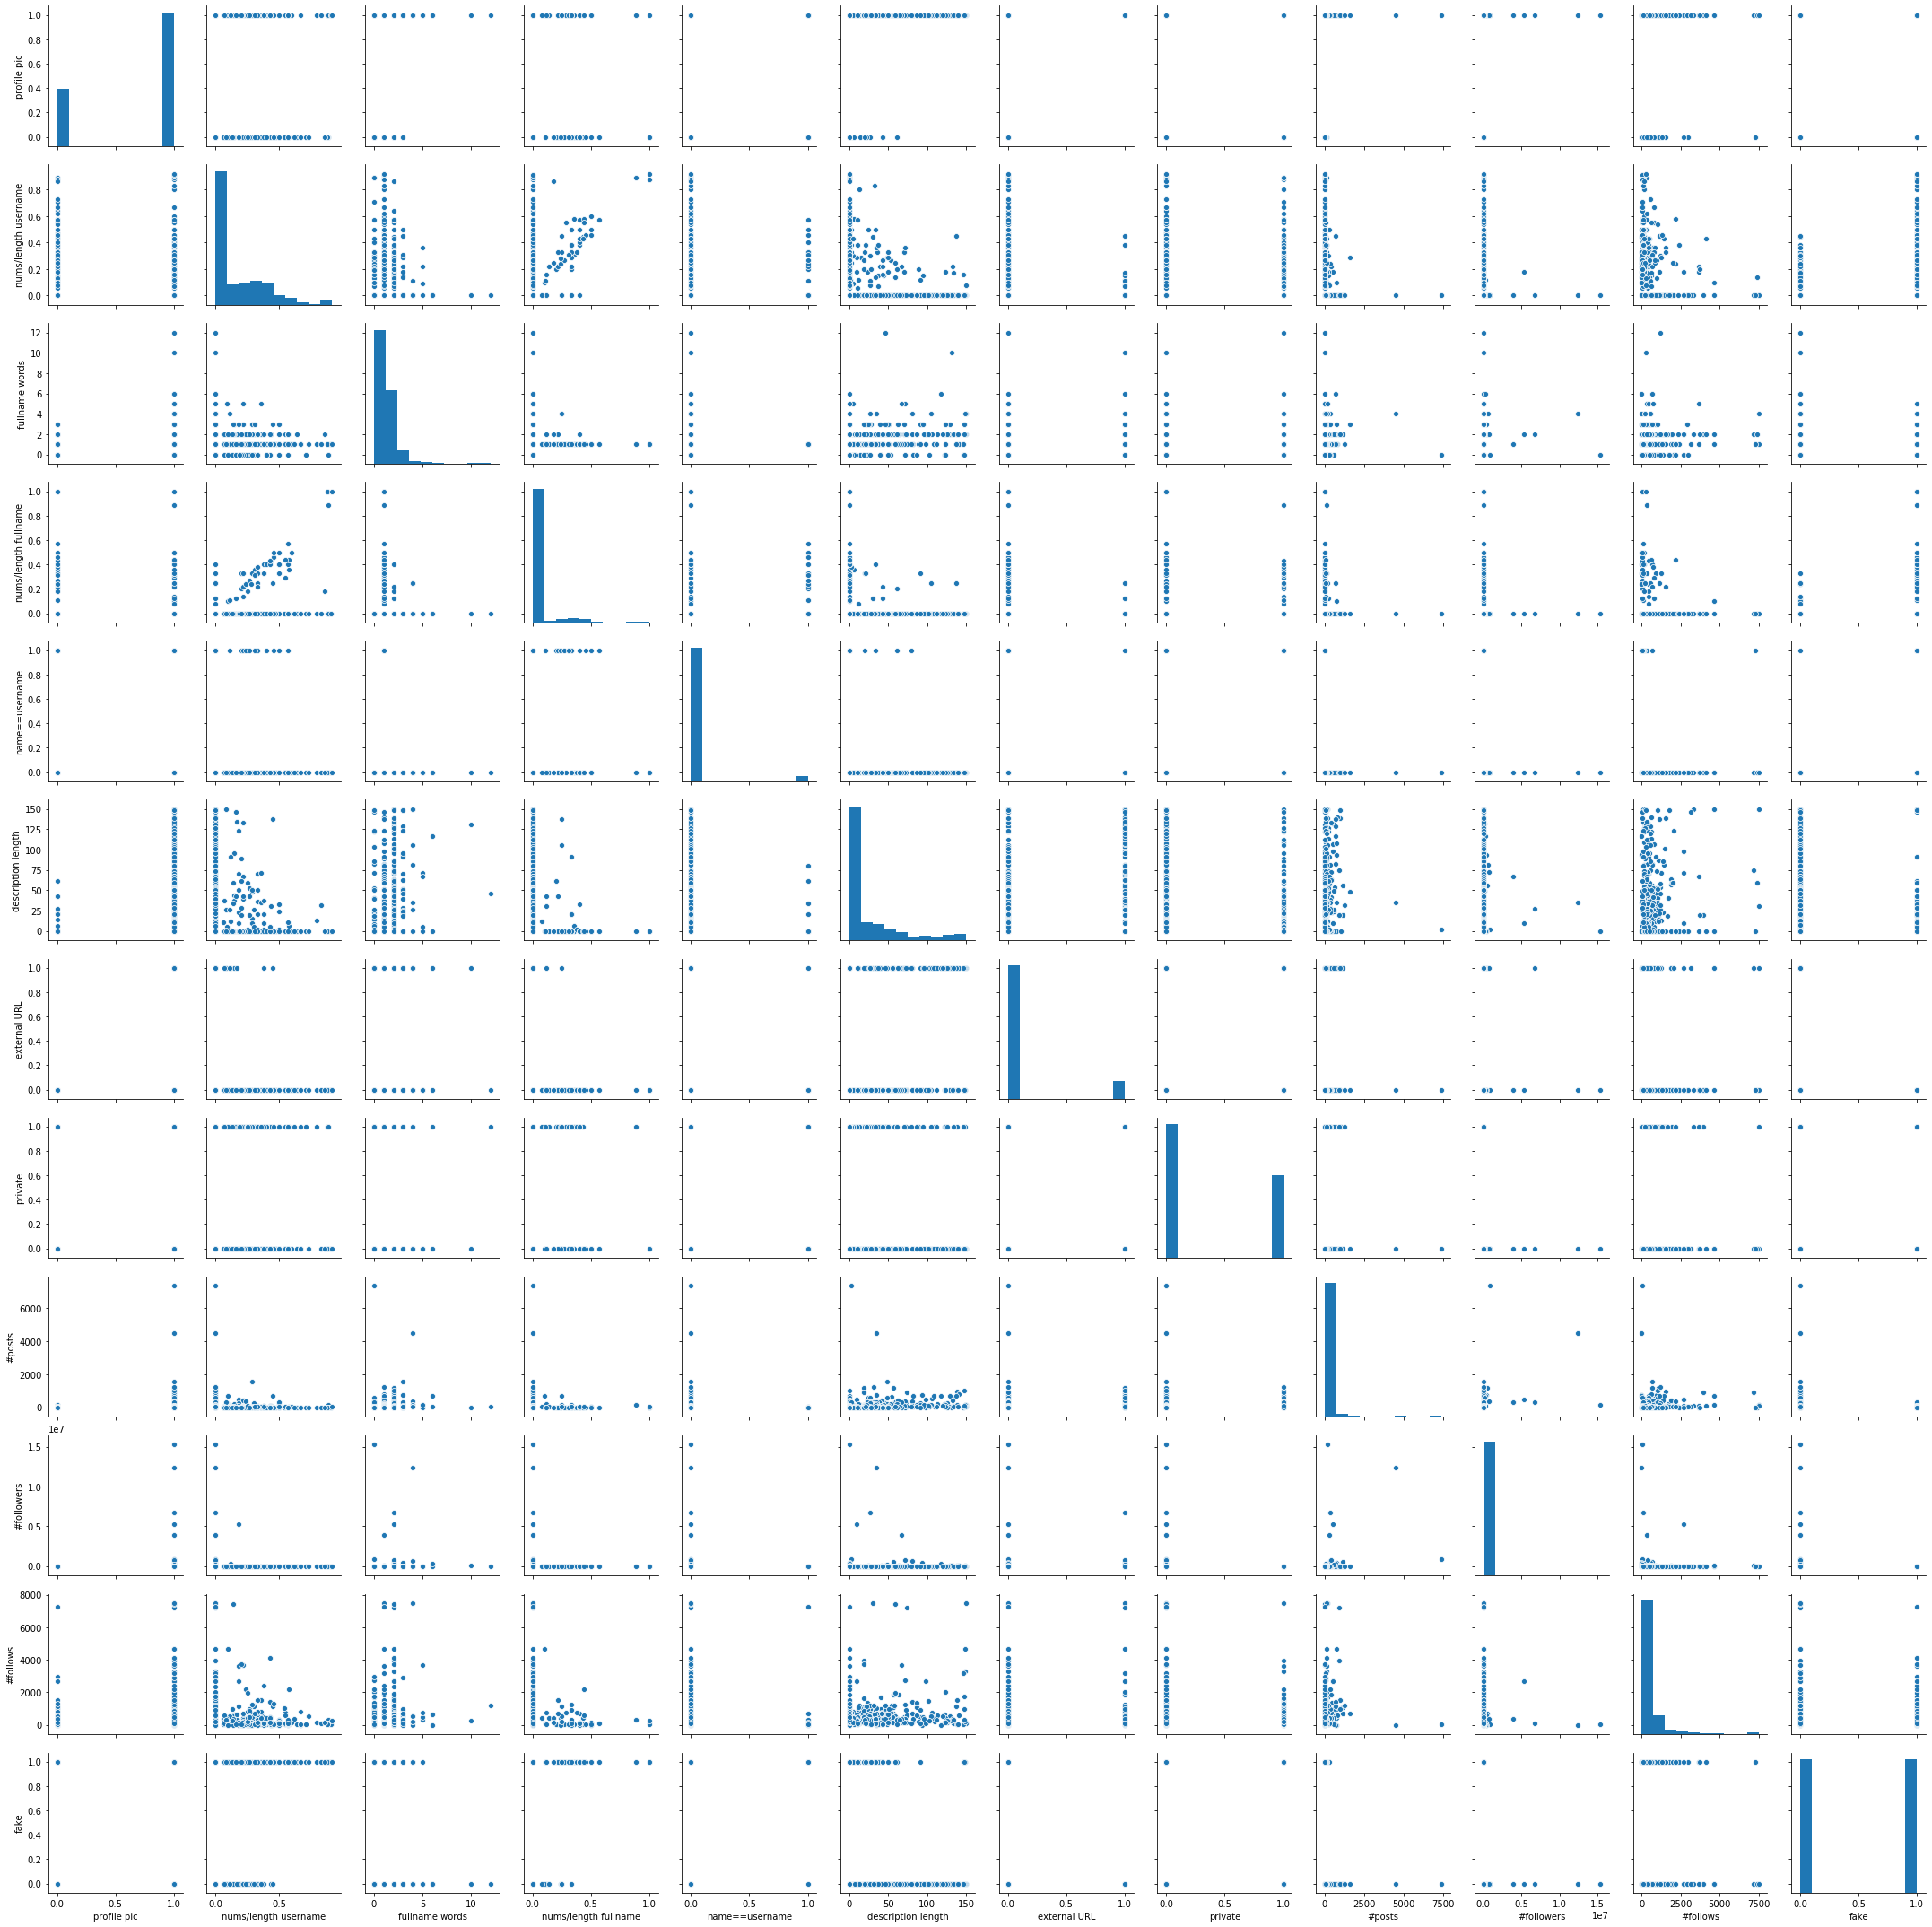

In [33]:
# Plot pairplot
plt.figure(figsize = (20,20))
sns.pairplot(instagram_df_train)

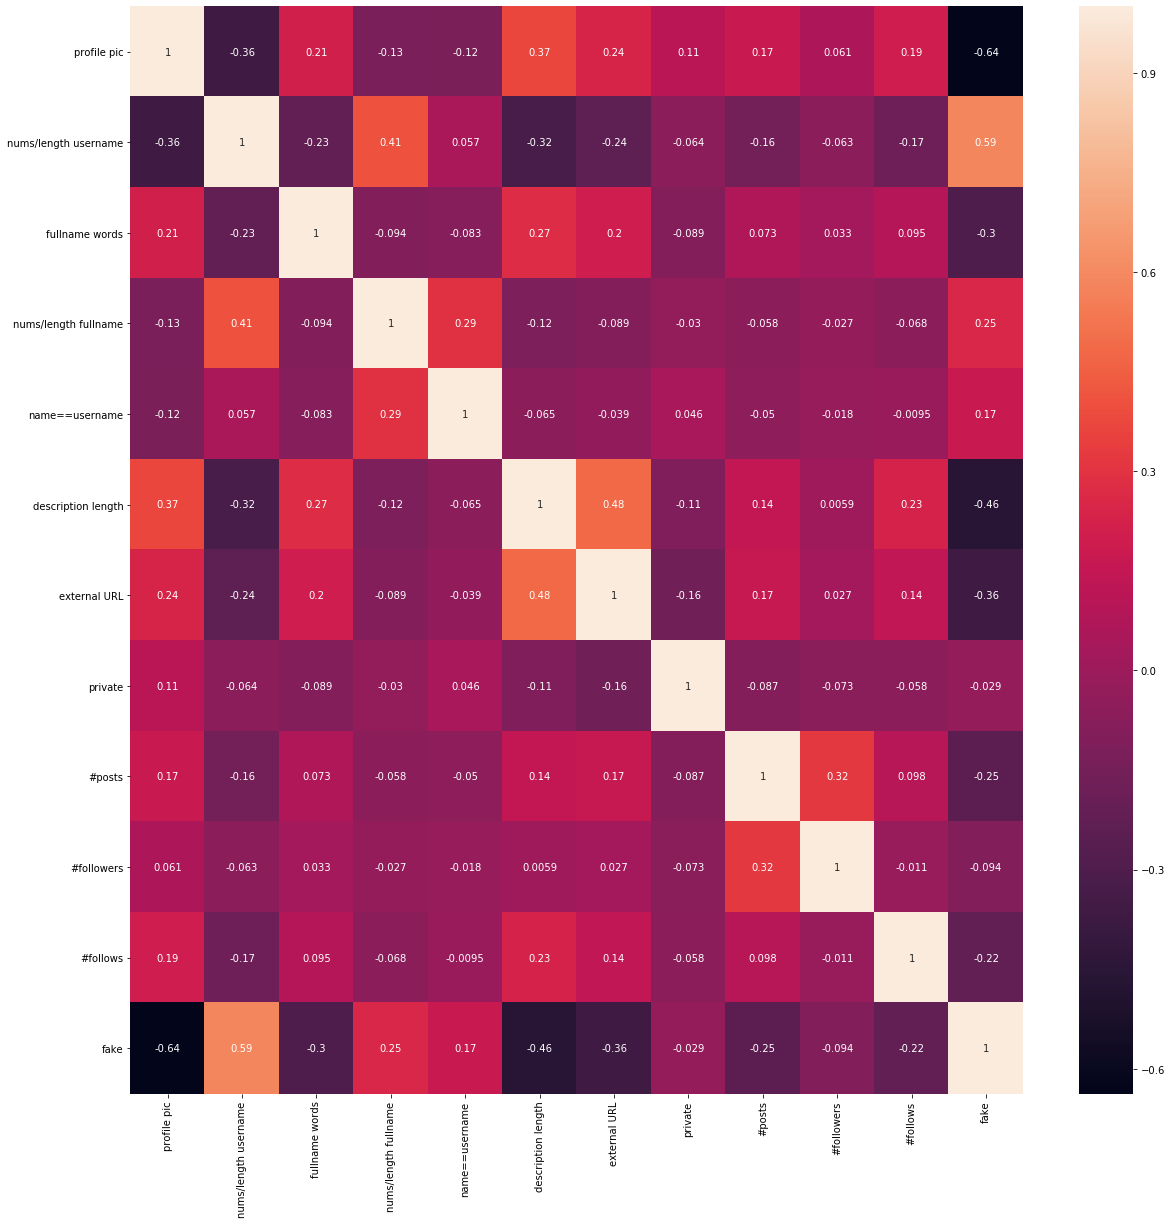

In [34]:
# Correlation plot
plt.figure(figsize=(20,20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)


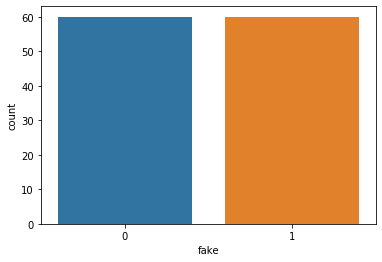

In [35]:
# Plot the count plot for 'fake', 'profile pic' and 'private' testing dataset
sns.countplot(instagram_df_test['fake'])

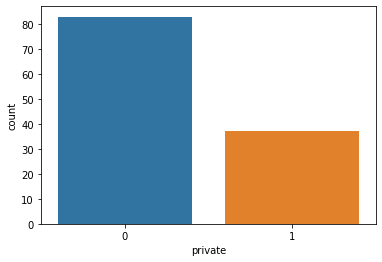

In [36]:
sns.countplot(instagram_df_test['private'])

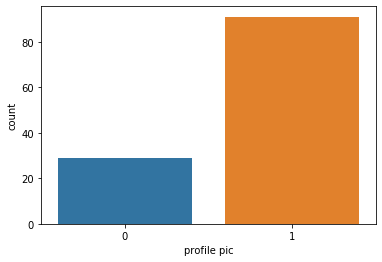

In [37]:
sns.countplot(instagram_df_test['profile pic'])

In [ ]:
# Prepare the data to feed the model

In [38]:
# Training and testing dataset (inputs)
X_train = instagram_df_train.drop(columns = ['fake'])
X_test = instagram_df_test.drop(columns = ['fake'])
X_train


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
5,1,0.00,4,0.00,0,81,1,0,344,669987,150
6,1,0.00,2,0.00,0,50,0,0,16,122,177
7,1,0.00,2,0.00,0,0,0,0,33,1078,76
8,1,0.00,0,0.00,0,71,0,0,72,1824,2713
9,1,0.00,2,0.00,0,40,1,0,213,12945,813


In [39]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
5,1,0.00,1,0.00,0,0,0,1,6,362,424
6,1,0.00,1,0.00,0,132,0,1,9,213,254
7,1,0.00,2,0.00,0,0,0,1,19,552,521
8,1,0.00,2,0.00,0,96,0,1,17,122,143
9,1,0.00,1,0.00,0,78,0,1,9,834,358


In [41]:
# Training and testing dataset (Outputs)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [42]:
y_train

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    1
565    1
566    1
567    1
568    1
569    1
570    1
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [43]:
y_test

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [44]:
# Scale the data before training model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [45]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [46]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [47]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
# Print out the shapes of the training and testing datasets
# What is the % of the training and testing data?

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

In [51]:
Training_data = len(X_train)/ (len(X_train) + len(X_test)) * 100
Training_data

82.75862068965517

In [52]:
Test_data = len(X_test)/ (len(X_train) + len(X_test)) * 100
Test_data

17.24137931034483